In [1]:
# ! python extractPSFParameters.py

In [24]:
# import numpy as np
# [(int(np.round(i)) - 1)*.06+.06 for i in np.logspace(0, 3, 15)]

In [1]:
import matplotlib.pyplot as plt
from analyzePSFParameters import psfParameters
test = psfParameters(source='data', baseDir='../')

## Centroid motion

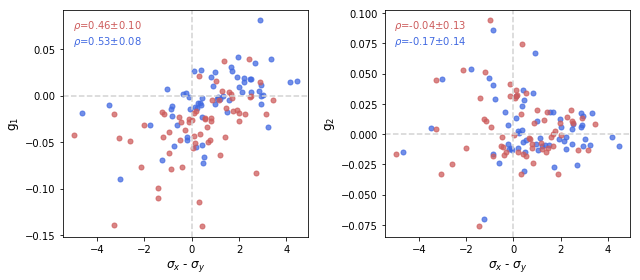

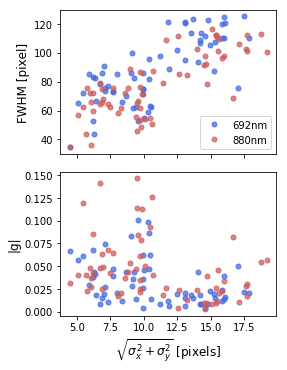

In [4]:
test.loadParameterSet(psfN='15', pix='DSSI')
test.plotCentroids()

## Color dependence of PSF size

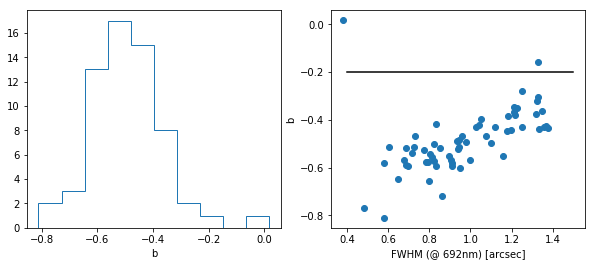

In [41]:
import numpy as np
sizeA = test.parameters['15']['DSSI']['a']['size'][:,-1]
sizeB = test.parameters['15']['DSSI']['b']['size'][:,-1]
lamA = 692
lamB = 880
b = (np.log(sizeA) - np.log(sizeB)) / (np.log(lamA) - np.log(lamB))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(b, histtype='step', bins=10)
plt.xlabel('b')

plt.subplot(122)
plt.plot(test.parameters['15']['DSSI']['a']['size'][:,-1]*.011, b, 'o')
plt.xlabel('FWHM (@ 692nm) [arcsec]')
plt.ylabel('b')

pts = np.linspace(.4, 1.5, 100)
# Kolmogorov prediction: sizeA = (lamA/lamB)^b * sizeB
plt.plot(pts, -0.2*np.ones(100), 'k-',)

# try some curves from Von Karman theory
def sizeRatioVK(lam1, lam2, r0_500, L0):
    numerator = 1 - 2.183 * (r0_500 / L0 * (lam1/500)**1.2 )**(.356)
    denominator = 1 - 2.183 * (r0_500 / L0 * (lam2/500)**1.2 )**(.356)
    return (lam1/lam2)**(-0.2) * np.sqrt(numerator / denominator)
   
# plt.plot(pts, sizeRatioVK, )

plt.show()

In [34]:
test.loadParameterSet(psfN='15', pix='LSST')
test.fileNumbers[1]
print(test.parameters['15']['LSST']['a']['size'][1,-1],
      test.parameters['15']['LSST']['b']['size'][1,-1])

print(test.parameters['15']['DSSI']['a']['g2'][1,-1],
      test.parameters['15']['DSSI']['b']['g2'][1,-1])


dataset 025 has an HSM error in moments estimation!
0.0 2.043579999804497
-0.0049128727317617575 -0.017974444517200594


In [63]:
test.loadParameterSet(psfN='15', pix='DSSI')
test.parameters['15']['DSSI']['a']['size'][1]

array([28.26563497, 30.46681532, 31.64859826, 32.36714348, 33.62625062,
       34.85430365, 35.22419489, 36.07514733, 36.829079  , 35.99644415,
       36.60613046, 34.61065012, 34.58865824, 34.42097238, 34.57257308])

In [29]:
test.fileNumbers

array(['017', '019', '021', '022', '025', '032', '034', '042', '051',
       '054', '062', '063', '067', '072', '074', '075', '079', '080',
       '083', '087', '089', '090', '094', '096', '098', '101', '103',
       '1039', '104', '113', '115', '117', '119', '120', '1262', '133',
       '134', '144', '153', '164', '168', '169', '175', '181', '192',
       '202', '203', '212', '241', '242', '258', '261', '270', '272',
       '288', '297', '298', '300', '302', '311', '312', '316', '317',
       '323', '327', '346', '355', '367', '368', '371', '372', '378',
       '380', '382', '390', '398', '405', '409', '484', '663', '693',
       '809'], dtype='<U4')

## Image quality

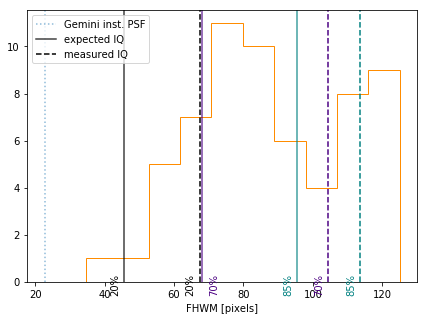

In [48]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

fig = plt.figure(figsize=(7,5))

ax = plt.subplot(111)
ax.hist(test.parameters['15']['DSSI']['a']['size'][:,-1], histtype='step', color='darkorange')
a_quants = np.quantile(test.parameters['15']['DSSI']['a']['size'][:,-1], [.2,.7,.85])
ax.set_xlabel('FHWM [pixels]')
lims = ax.axis()
ax.axvline(22.7, alpha=0.5, linestyle=':', label='Gemini inst. PSF')
ax.axvline(45.5, linestyle='-', color='k', alpha=0.75, label='expected IQ')
ax.text(45.5-4, .01, '20%', color='k', rotation=90)
ax.axvline(68.2, linestyle='-', color='indigo', alpha=0.75)
ax.text(68.2+2, .01, '70%', color='indigo', rotation=90)
ax.axvline(95.5, linestyle='-', color='teal', alpha=0.75)
ax.text(95.5-4, .01, '85%', color='teal', rotation=90)
ax.axvline(a_quants[0], linestyle='--', color='k', label='measured IQ')
ax.text(a_quants[0]-4, .01, '20%', color='k', rotation=90)
ax.axvline(a_quants[1], linestyle='--', color='indigo')
ax.text(a_quants[1]-4, .01, '70%', color='indigo', rotation=90)
ax.axvline(a_quants[2], linestyle='--', color='teal')
ax.text(a_quants[2]-4, .01, '85%', color='teal', rotation=90)

ax.legend(loc=2)
plt.show()

## Plot ellipticity components

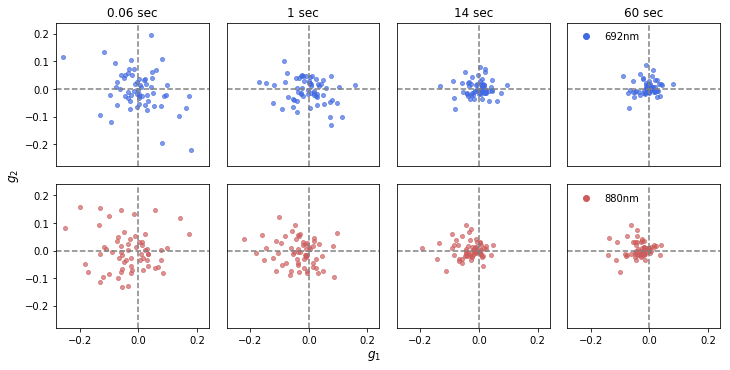

In [47]:
test.loadParameterSet(psfN='15', pix='DSSI')
test.plotEComps(pix='DSSI', save=False);

## Compare 30s PSF parameters:

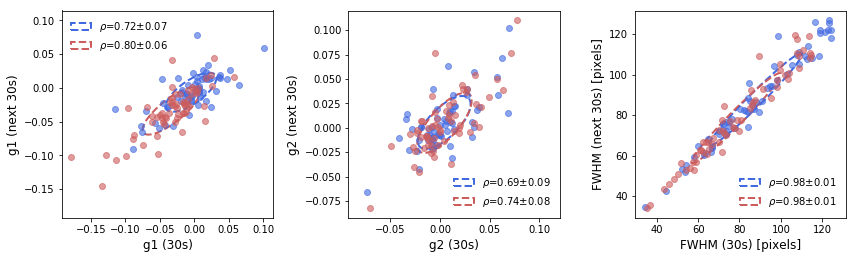

In [2]:
test.analyzeBinnedParameters('DSSI')
test.plotBinnedParameters('DSSI', psfN='2', figsize=(12,3.7), ellipse=True, 
                          ellipseArgs={'linewidth':2, 'linestyle':'--'})

## 15 sec ellipticity

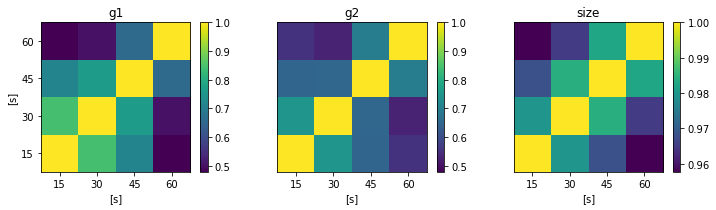

In [3]:
import numpy as np
plt.figure(figsize=(12,2.75))
fifteenSec = np.ones((3,4,4))
for k in range(3):
    param = ['g1','g2','size'][k]
    for i in range(4):
        for j in range(i,4):
            if i!=j:
                fifteenSec[k,i,j] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']
                fifteenSec[k,j,i] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']

vmin, vmax = np.min(fifteenSec[:2]), np.max(fifteenSec[:2])
for k in range(3):
    param = ['g1','g2','size'][k]
    plt.subplot(1,3,k+1)
    if k<2:
        plt.imshow(fifteenSec[k], origin='lower', vmin=vmin, vmax=vmax)
    else: plt.imshow(fifteenSec[k], origin='lower')
    plt.colorbar()
    plt.title(param)
    plt.xticks([0,1,2,3],[15,30,45, 60])
    if k == 0: 
        plt.ylabel('[s]')
        plt.yticks([0,1,2,3],[15,30,45, 60])
    else: plt.yticks([])
    plt.xlabel('[s]')
plt.show()

In [108]:
import analysisHelper as helper
test.loadParameterSet(psfN='4', pix='DSSI')
def correlationDropoff(psfN='4', randomSort=False):
    n = 31
    if randomSort:
        t = np.random.permutation(62)
        sortedIdx = {'a': t, 'b': t}        
    else:
        sortedIdx = {'a': np.argsort(test.parameters[psfN]['DSSI']['a']['size'].mean(axis=1)),
                     'b': np.argsort(test.parameters[psfN]['DSSI']['b']['size'].mean(axis=1))}
    
    
    goodSeeing = {c: {ellipticity: test.parameters[psfN]['DSSI'][c][ellipticity][sortedIdx[c][:n]] 
                      for ellipticity in ['g1','g2']} 
                  for c in ['a','b']}
    badSeeing = {c: {ellipticity: test.parameters[psfN]['DSSI'][c][ellipticity][sortedIdx[c][n:]] 
                     for ellipticity in ['g1','g2']} 
                 for c in ['a','b']}
    
    return (helper.corrDict(goodSeeing, 'ellipticity'), helper.corrDict(goodSeeing, 'ellipticity', bootstrap=True, Nboot=31),
            helper.corrDict(badSeeing, 'ellipticity'), helper.corrDict(badSeeing, 'ellipticity', bootstrap=True, Nboot=31))

In [109]:
def plotRvT(ax1, ax2, goodSeeing, goodSeeingBoot, badSeeing, badSeeingBoot, color, alpha=1):
    distances = ['01', '12', '23', '02', '13', '03']
    ptsA = [0,0,0,1,1,2]
    ptsB = [i+.1 for i in ptsA]
    
    for i in range(2):
        param = ['g1', 'g2'][i]
        ax = [ax1, ax2][i]
        ax.errorbar(ptsA, [goodSeeing[param][color][j] for j in distances], 
                    yerr = [np.std(goodSeeingBoot[param][color][j]) for j in distances], 
                    fmt='^', color='darkblue', capsize=2, alpha=alpha)
        ax.errorbar(ptsB, [badSeeing[param][color][j] for j in distances], 
                    yerr = [np.std(badSeeingBoot[param][color][j]) for j in distances], 
                    fmt='o', color='darkorange', capsize=2, alpha=alpha)

        ax.set_xticks([0,1,2])
        ax.set_xticklabels(['15','30','45'])
        ax.set_ylabel(r'$\rho$')
        ax.set_xlabel('$\Delta$ t [s]')
        ax.set_title(param)
        ax.set_ylim([.2,.9])
    return ax1, ax2

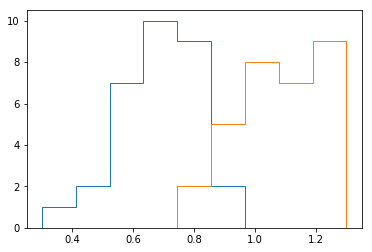

In [103]:
sortedIdx = {'a': np.argsort(test.parameters['4']['DSSI']['a']['size'].mean(axis=1)),
             'b': np.argsort(test.parameters['4']['DSSI']['b']['size'].mean(axis=1))}
bins=np.linspace(30,130, 10)*.01
plt.hist(test.parameters['4']['DSSI']['a']['size'][sortedIdx['a'][:31],-1]*.01, bins=bins, histtype='step')
plt.hist(test.parameters['4']['DSSI']['a']['size'][sortedIdx['a'][31:],-1]*.01, bins=bins, histtype='step')
# plt.hist(test.parameters['4']['DSSI']['b']['size'][sortedIdx['b'][:31],-1]*.01, bins=bins, histtype='step')
# plt.hist(test.parameters['4']['DSSI']['b']['size'][sortedIdx['b'][31:],-1]*.01, bins=bins, histtype='step')
plt.show()

In [110]:
goodR, goodRBoot, badR, badRBoot = correlationDropoff()

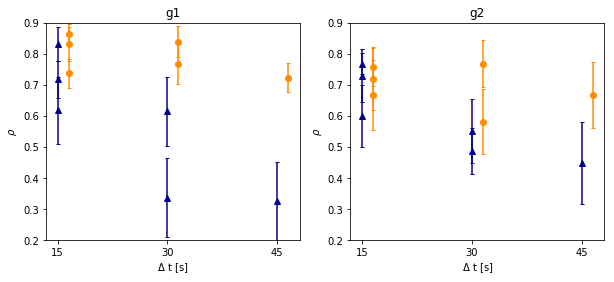

In [116]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
split1, split1Boot, split2, split2Boot = correlationDropoff(randomSort=True)
plotRvT(ax1, ax2, split1, split1Boot, split2, split2Boot, color='a');

(<matplotlib.axes._subplots.AxesSubplot at 0x1a2249dba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a21f85fd0>)

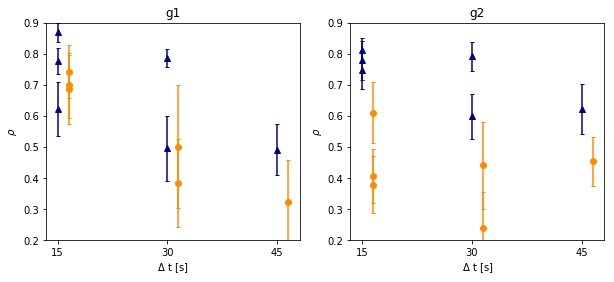

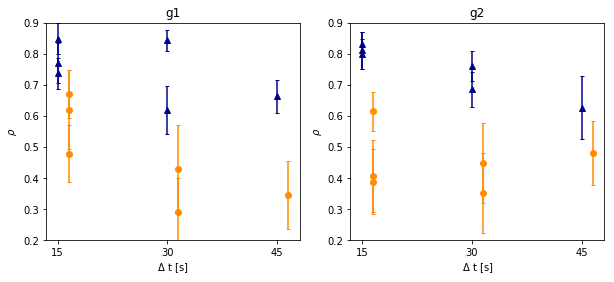

In [111]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
plotRvT(ax1, ax2, goodR, goodRBoot, badR, badRBoot, color='a')
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
plotRvT(ax1, ax2, goodR, goodRBoot, badR, badRBoot, color='b')

## Plot ellipticity dropoff

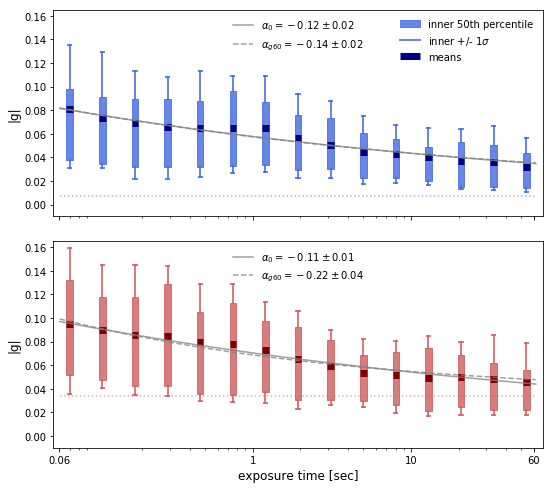

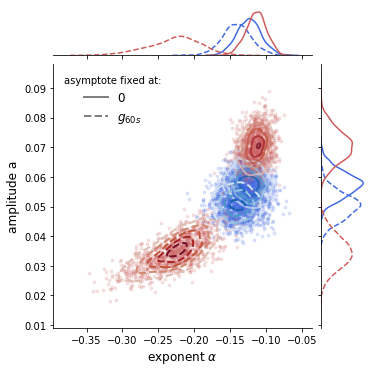

In [3]:
import matplotlib.pyplot as plt
from analyzePSFParameters import psfParameters
test = psfParameters(source='data')
test.loadParameterSet(psfN='15', pix='DSSI')
test.analyzeEMag(pix='DSSI', plot=True, expectedAsymptote=True)